# XGBoost
In this notebook, we fit an XGBoost model to the regression problem of predicting mean activity based on non-wearable features taken from the UK biobank but with PCA components.

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For reproducibility
np.random.seed(42)

In [2]:
# Path to dataset
PATH = '/cdtshared/wearables/students/group5/'

# Features from biobank
X_train = pd.read_pickle(PATH+"XtrainPCAELLIE.pkl")
X_val = pd.read_pickle(PATH+"XvalPCAELLIE.pkl")
X_test = pd.read_pickle(PATH+"XtestPCAELLIE.pkl")
# Outcome
y_train = pd.read_pickle(PATH+"ytrainPCAELLIE.pkl")
y_val = pd.read_pickle(PATH+"yvalPCAELLIE.pkl")
y_test = pd.read_pickle(PATH+"ytestPCAELLIE.pkl")

## Data prep

In [3]:
print(X_train.shape)

(60829, 60)


# Random Forest

In [4]:
%cd ..
%cd ..
from time import time
from xgboost import XGBRegressor
from accel.training import model_tune, score

/cdthome/xqe353/Custom Encodings
/cdthome/xqe353


## Timing
Timing how long it takes to fit an SVM to different sizes of data. Keep in mind, there are 69567 training observations.

In [5]:
Ns = np.arange(100,10001,1000)
Ns

array([ 100, 1100, 2100, 3100, 4100, 5100, 6100, 7100, 8100, 9100])

In [6]:
reps = 5
times = np.zeros((reps,len(Ns)))

for r in range(reps):
    print("Rep",r, "Size:", end="")
    for i in range(len(Ns)):
        print(Ns[i],end=", ")
        N = Ns[i]
        clf = XGBRegressor() # default RF
        start = time()
        clf.fit(X_train[:N], y_train[:N ]) #train model and time
        times[r,i] = time() - start
    print()

Rep 0 Size:100, 1100, 2100, 3100, 4100, 5100, 6100, 7100, 8100, 9100, 
Rep 1 Size:100, 1100, 2100, 3100, 4100, 5100, 6100, 7100, 8100, 9100, 
Rep 2 Size:100, 1100, 2100, 3100, 4100, 5100, 6100, 7100, 8100, 9100, 
Rep 3 Size:100, 1100, 2100, 3100, 4100, 5100, 6100, 7100, 8100, 9100, 
Rep 4 Size:100, 1100, 2100, 3100, 4100, 5100, 6100, 7100, 8100, 9100, 


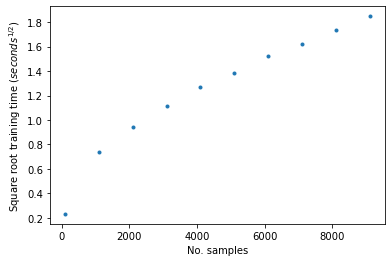

In [7]:
plt.plot(Ns, np.sqrt(np.mean(times,axis=0)), ".")
plt.xlabel("No. samples")
plt.ylabel("Square root training time ($seconds^{1/2}$)")
plt.show()

In [8]:
root_mean_times = np.sqrt(np.mean(times,axis=0))
m = root_mean_times[-1] / Ns[-1]
m

0.00020315112846248711

In [9]:
# Time it takes for 9000 samples
(m * 9100)

1.8486752690086328

In [10]:
N_train = X_train.shape[0]
pred_secs = (m * N_train)**2 #answer in seconds
print("Predicted training time in minutes", pred_secs / 60) # answer in minutes

Predicted training time in minutes 2.5451218630573544


In [11]:
# fitting the classifier
clf = XGBRegressor()
start = time()
clf.fit(X_train, y_train) #train model and time
time() - start

21.592031717300415

How good is the out the box model?

In [12]:
from accel.training import score

In [13]:
y_pred = clf.predict(X_val)

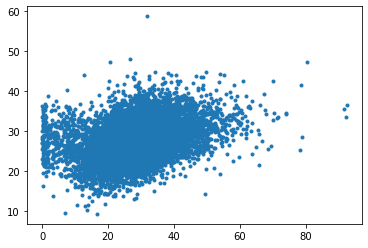

In [14]:
plt.plot(y_val,y_pred, ".")

In [15]:
score(y_val, y_pred)

MSE is:  73.63027472565498
R2 is:  0.12575348634689798
Explained variance is: 0.12585694538481962


(<function sklearn.metrics._regression.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')>,
 <function sklearn.metrics._regression.mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared=True)>,
 <function sklearn.metrics._regression.explained_variance_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')>)

# Hyper-parameter tuning
We perform hyper-parameter tuning on the linear SVM since it is less time-consuming to fit

In [16]:
from accel.training import model_tune

In [17]:
y_train.std()

9.311881251340733

In [18]:
# define lists of params interested in

# Number of trees in random forest
n_estimators = [10, 25, 50, 100, 150]
# Maximum number of levels in tree
max_depth = [6, 10, 50]
max_depth.append(None)
# The learning rate used to weight each model
learning_rate = [0.3, 0.1, 0.01, 0.001]
# Subsample ratio of the training instance
subsample = [0.7, 1.0]
# L2 regularisation
reg_lambda = [0.0, 0.5, 0.7, 1.0]
# L1 regularisation
reg_alpha = [0.0, 0.5, 0.7, 1.0]

# Create the grid
params = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'reg_lambda': reg_lambda,
               'reg_alpha': reg_alpha}

In [19]:
# Get the optimal parameters
model_tune(XGBRegressor(), 
                 params, X_train, y_train, X_val, y_val, 30)

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits


/cdthome/xqe353/.conda/envs/cdt_wearables/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits


/cdthome/xqe353/.conda/envs/cdt_wearables/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits


/cdthome/xqe353/.conda/envs/cdt_wearables/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Best parameter combo: OrderedDict([('learning_rate', 0.1), ('max_depth', 6), ('n_estimators', 100), ('reg_alpha', 1.0), ('reg_lambda', 1.0), ('subsample', 1.0)])
Best validation MSE: 1.6316569391022506e-01


BayesSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
              estimator=XGBRegressor(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_we...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
              n_

Best parameters: <br>
**reg_lambda**:1.0 <br>
**max_depth**: 6 <br>
**reg_alpha**: 1.0 <br>
**subsample**: 1.0 <br>
**learning_rate**: 0.1 <br>
**n_estimators**: 100 <br>

In [20]:
clf = XGBRegressor(reg_lambda=1.0, max_depth=6, reg_alpha=1, learning_rate = 0.1, subsample = 1, n_estimators = 100)
clf.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=3,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=1,
             reg_lambda=1.0, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

MSE is:  70.47936582529184
R2 is:  0.16316569391022506
Explained variance is: 0.16328062793585318


(<function sklearn.metrics._regression.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')>,
 <function sklearn.metrics._regression.mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared=True)>,
 <function sklearn.metrics._regression.explained_variance_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')>)

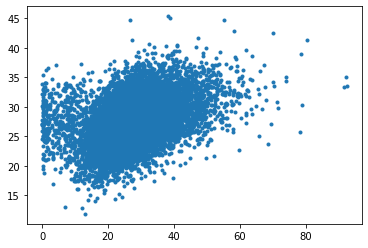

In [21]:
y_pred = clf.predict(X_val)
plt.plot(y_val,y_pred, ".")
score(y_val, y_pred)

# Test

In [22]:
X = np.vstack((X_train, X_val))
y = np.concatenate([y_train, y_val])

In [23]:
model = XGBRegressor(reg_lambda=1.0, max_depth=6, reg_alpha=1, learning_rate = 0.1, subsample = 1, n_estimators = 100)
model.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=3,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=1,
             reg_lambda=1.0, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [24]:
# Get the test set performance
score(y_test, model.predict(X_test))

MSE is:  72.26508600639974
R2 is:  0.1587957865405487
Explained variance is: 0.1588149755584346


(<function sklearn.metrics._regression.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')>,
 <function sklearn.metrics._regression.mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared=True)>,
 <function sklearn.metrics._regression.explained_variance_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')>)